# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [13]:
import pandas as pd
# C:\\Users\\Diana\\Desktop\\Univer\\data-analysis\\DATA-ANALYSYS_2\\DZ\\DZ1\\adult_data.csv
pass_data = pd.read_csv('adult_data.csv', header=None, skipinitialspace=True, names=["age", 
            "workclass", "fnlwgt", "education", "education-num", 
                "marital-status", "occupation", "relationship", "race",
                    "sex", "capital-gain", "capital-loss", "hours-per-week", 
                        "native-country", "50K"])
pass_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Вопрос 1
Сколько мужчин и женщин в выборке?

In [14]:
# Впишите решение сюда
pass_data.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

### Вопрос 2
Каков средний возраст мужчин?


In [21]:
# Впишите решение сюда
pass_data[pass_data.sex=='Male'].age.mean()

39.43354749885268

### Вопрос 3
Какова доля граждан США?

In [71]:
# Впишите решение сюда
len(pass_data[pass_data['native-country']=='United-States'])/ len(pass_data)

0.895857006848684

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

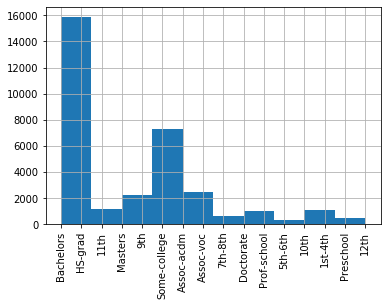

In [89]:
# Впишите решение сюда
pass_data.education.hist(xrot = 90)

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [ ]:
# Впишите решение сюда

### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [140]:
# Впишите решение сюда
# pass_data[(pass_data['50K'] == '>50K')]
if (len(pass_data[(pass_data['50K']== '>50K') & (pass_data.education=='HS-grad')])/len(pass_data[(pass_data['50K'] == '>50K')])) > 0.5:
    print('Yes')
else:
    print('No')

No


### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [39]:
# Впишите решение сюда
pass_data.groupby(['sex','race']).age.max()

sex     race              
Female  Amer-Indian-Eskimo    80
        Asian-Pac-Islander    75
        Black                 90
        Other                 74
        White                 90
Male    Amer-Indian-Eskimo    82
        Asian-Pac-Islander    90
        Black                 90
        Other                 77
        White                 90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [108]:
# Впишите решение сюда
data = pass_data[pass_data.occupation == 'Farming-fishing']
data['native-country'].drop_duplicates()

16       United-States
255           Cambodia
500             Poland
771          Guatemala
861             Mexico
2353           England
3532                 ?
6006       Philippines
6559             Italy
8551       Puerto-Rico
11271          Vietnam
12621          Germany
15177            Japan
16486           Canada
20549       Yugoslavia
21145             Cuba
22391         Portugal
25761      El-Salvador
25943             Hong
28654          Ireland
29466           France
Name: native-country, dtype: object

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [117]:
# Впишите решение сюда
# 1)
first = len(pass_data[(pass_data.sex == 'Male')& (pass_data.education == 'Bachelors')])/len(pass_data[(pass_data.sex == 'Male') & (pass_data.education == 'Masters')])
print('Male Bachelors to Masters: ', first)
second = len(pass_data[(pass_data.sex == 'Female')& (pass_data.education == 'Bachelors')])/len(pass_data[(pass_data.sex == 'Female') & (pass_data.education == 'Masters')])
print('Female Bachelors to Masters: ', second)
if (first > second):
    print('Male')
else: print('Female') 

Male Bachelors to Masters:  3.14743049705139
Female Bachelors to Masters:  3.0205223880597014
Male


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [64]:
# Впишите решение сюда
hours = pass_data['hours-per-week'].max()
print('hours = ', hours)
count = pass_data[pass_data['hours-per-week']== hours].shape[0]
print('count = ',count)
salary = pass_data[pass_data['hours-per-week']== hours]['50K']
print('salary:\n', salary)

hours =  99
count =  85
salary:
 935       >50K
1172      >50K
1887      >50K
3578      >50K
4086     <=50K
         ...  
30992    <=50K
31681     >50K
31699    <=50K
32469    <=50K
32531    <=50K
Name: 50K, Length: 85, dtype: object
